In [3]:
#import useful libraries
import os
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import
import pickle
import configuration
import general_statistics as stats
import figures as figs
import matplotlib.cm as cm
from matplotlib import colors
from scipy import signal
from scipy import stats as sstats
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import scipy
cmap = cm.jet
import math
from sklearn.datasets import load_iris
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.cross_decomposition import CCA
from sklearn.model_selection import cross_val_score
import random
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold
import seaborn as sns


import warnings
warnings.filterwarnings("ignore")
input_directory = os.environ['PROJECT_DIR'] + 'neural_analysis/figures/mean_representational_distance/lda_3/'
figure_path = os.environ['PROJECT_DIR'] +'neural_analysis/figures/mean_representational_distance/lda_3/non_nan/'


In [27]:
file_2 = 'prob_product_overlapping.npy'
file_1 = 'cumulative_exp_time_sum_overlapping.npy'
file_3 = 'neural_overlapping.npy'
exp_time_overlapping = np.load(input_directory + file_1)
prob_overlapping = np.load(input_directory + file_2)
neural_overlapping = np.load(input_directory + file_3, allow_pickle=True)

     
file_2 = 'prob_product__random.npy'
file_1 = 'cumulative_exp_time_sum_random.npy'  
file_3 = 'neural_random.npy'
exp_time_random = np.load(input_directory + file_1)
prob_random = np.load(input_directory + file_2)
neural_random = np.load(input_directory + file_3, allow_pickle=True)

file_2 = 'prob_product__stable.npy'
file_1 = 'cumulative_exp_time_sum_stable.npy' 
file_3 = 'neural_stable.npy'
exp_time_stable= np.load(input_directory + file_1)
prob_stable = np.load(input_directory + file_2)
neural_stable = np.load(input_directory + file_3, allow_pickle=True)

correlation_object = np.zeros((20,))
correlation_object1 = np.zeros((20,))
correlation_object2 = np.zeros((20,))
correlation_empty = np.zeros((20,))
correlation_empty1 = np.zeros((20,))
correlation_empty2 = np.zeros((20,))
correlation_cross = np.zeros((20,))
correlation_cross1 = np.zeros((20,))
correlation_cross2 = np.zeros((20,))

for i in range(20):
    x = np.concatenate((exp_time_overlapping[0][:,i],exp_time_random[0][:,i],exp_time_stable[0][[0,2,3,4],i]))
    y = np.concatenate((prob_overlapping[0][:,i],prob_random[0][:,i],prob_stable[0][:,i]))
    z = np.concatenate((neural_overlapping[0][:,i],neural_random[0][:,i],neural_stable[0][:,i]))
    corr = np.corrcoef(x,y)
    corr1 = np.corrcoef(x,z)
    corr2 = np.corrcoef(y,z)
    if np.isnan(corr[0,1]) == False and np.isnan(corr1[0,1]) == False and np.isnan(corr2[0,1]) == False :
        correlation_object[i] = corr[0,1]
        correlation_object1[i] = corr1[0,1]
        correlation_object2[i] = corr2[0,1]
     
    x = np.concatenate((exp_time_overlapping[1][:,i],exp_time_random[1][:,i],exp_time_stable[1][[0,2,3,4],i]))
    y = np.concatenate((prob_overlapping[1][:,i],prob_random[1][:,i],prob_stable[1][:,i]))
    z = np.concatenate((neural_overlapping[1][:,i],neural_random[1][:,i],neural_stable[1][:,i]))
    corr = np.corrcoef(x,y)
    corr1 = np.corrcoef(x,z)
    corr2 = np.corrcoef(y,z)
    if np.isnan(corr[0,1]) == False and np.isnan(corr1[0,1]) == False and np.isnan(corr2[0,1]) == False :
        correlation_empty[i] = corr[0,1]
        correlation_empty1[i] = corr1[0,1]
        correlation_empty2[i] = corr2[0,1]
    
    x = np.concatenate((exp_time_overlapping[2][:,i],exp_time_overlapping[3][:,i],exp_time_random[2][:,i],exp_time_stable[2][[0,2,3,4],i]))
    y = np.concatenate((prob_overlapping[2][:,i],prob_overlapping[3][:,i],prob_random[2][:,i],prob_stable[2][:,i]))
    a = np.mean(neural_overlapping[2][:,i].reshape(2,5),axis = 0)
    b = np.mean(neural_overlapping[3][:,i].reshape(2,5),axis = 0)   
    c = np.mean(neural_random[2][:,i].reshape(4,5),axis = 0)
    d = np.mean(neural_stable[2][:,i].reshape(4,4),axis = 0)

    z = np.concatenate((a,b,c,d))
    corr = np.corrcoef(x,y)
    corr1 = np.corrcoef(x,z)
    corr2 = np.corrcoef(y,z)
    if np.isnan(corr[0,1]) == False and np.isnan(corr1[0,1]) == False and np.isnan(corr2[0,1]) == False :
        correlation_cross[i] = corr[0,1]
        correlation_cross1[i] = corr1[0,1]
        correlation_cross2[i] = corr2[0,1]

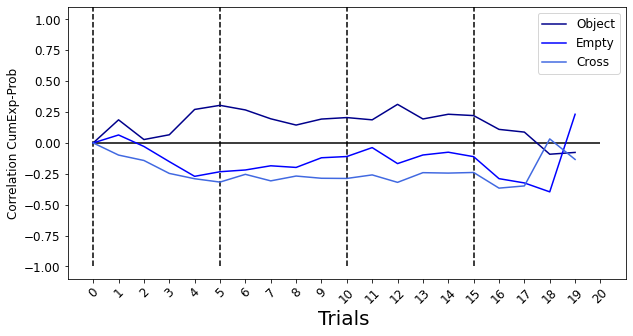

In [28]:
random_mean_occ= correlation_object
stable_mean_occ = correlation_empty
overlapping_mean_occ = correlation_cross

figure, axes = plt.subplots()

time = np.arange(0,20)
axes.plot(time,random_mean_occ[time],'darkblue')
axes.plot(time,stable_mean_occ[time],'blue')
axes.plot(time,overlapping_mean_occ[time],'royalblue')

axes.set_ylim([-1.1,1.1])
axes.set_ylabel('Correlation CumExp-Prob',fontsize = 12)
axes.tick_params(axis='x', labelsize=12)
axes.set_xticks(np.arange(0,21))

axes.tick_params(axis='y', labelsize=12)  
for tick in axes.get_xticklabels():
    tick.set_rotation(45)
axes.hlines(0,0,20,color = 'k')  
axes.legend(['Object','Empty','Cross'], fontsize = 12)
axes.vlines([0,5,10,15], -1, 3, colors='k', linestyles='dashed')

axes.set_xlabel('Trials ',fontsize = 20)

figure.set_size_inches([10,5])
figure.patch.set_facecolor('white')
figure.savefig(figure_path + 'correlation_mix_condition.png')

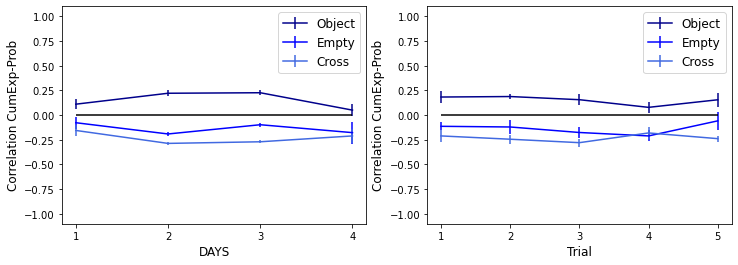

In [30]:
random = correlation_object.reshape(4,5)
stable = correlation_empty.reshape(4,5)
overlapping = correlation_cross.reshape(4,5)
titles = ['Object','Empty','Cross']
figure, axes = plt.subplots(1,2)
color_random = ['darkblue','blue','royalblue']
color_stable = ['blue','red','tomato']
color_overlapping = ['royalblue','limegreen','y','cyan']

trials = np.arange(0,5)
axes[1].errorbar(trials,np.nanmean(random,axis = 0),np.nanstd(random,axis = 0)/np.sqrt(random.shape[0]),color = color_random[0])
axes[1].errorbar(trials,np.nanmean(stable,axis = 0),np.nanstd(stable,axis = 0)/np.sqrt(stable.shape[0]),color = color_stable[0])
axes[1].errorbar(trials,np.nanmean(overlapping,axis = 0),np.nanstd(overlapping,axis = 0)/np.sqrt(overlapping.shape[0]), color = color_overlapping[0])

trials = np.arange(0,4)
axes[0].errorbar(trials,np.nanmean(random,axis = 1),np.nanstd(random,axis = 1)/np.sqrt(random.shape[0]),color = color_random[0])
axes[0].errorbar(trials,np.nanmean(stable,axis = 1),np.nanstd(stable,axis = 1)/np.sqrt(stable.shape[0]),color = color_stable[0])
axes[0].errorbar(trials,np.nanmean(overlapping,axis = 1),np.nanstd(overlapping,axis = 1)/np.sqrt(overlapping.shape[0]), color = color_overlapping[0])

for j in range(2):
    axes[j].set_ylim([-1.1,1.1])
        
trials_comparison_pos = [0,1,2,3,4]
tick_label = ['1','2','3','4','5']

axes[1].set_xticks(trials_comparison_pos)
axes[1].set_xlabel('Trial', fontsize = 12)
axes[1].set_ylabel('Correlation CumExp-Prob', fontsize = 12)
axes[1].set_xticklabels(tick_label)
axes[1].legend(titles,fontsize= 12)
axes[1].hlines(0,0,4,color = 'k')  

trials_comparison_pos = [0,1,2,3]
tick_label = ['1','2','3','4']
axes[0].set_xticks(trials_comparison_pos)
axes[0].set_xlabel('DAYS', fontsize = 12)
axes[0].set_ylabel('Correlation CumExp-Prob', fontsize = 12)
axes[0].set_xticklabels(tick_label)
axes[0].legend(titles,fontsize= 12)
axes[0].hlines(0,0,3,color = 'k')  

figure.set_size_inches([12,4])

figure.patch.set_facecolor('white')
figure.savefig(figure_path + 'correlation_mix_condition2.png')

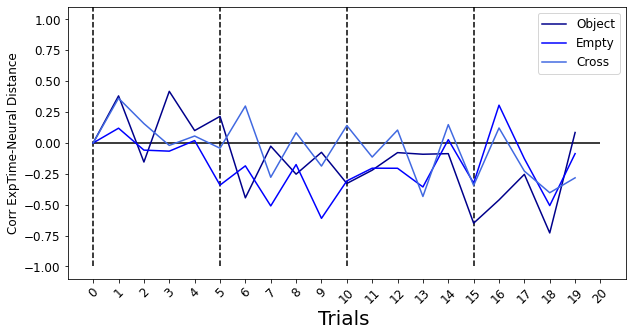

In [32]:
random_mean_occ1= correlation_object1
stable_mean_occ1 = correlation_empty1
overlapping_mean_occ1 = correlation_cross1

figure, axes = plt.subplots()

time = np.arange(0,20)
axes.plot(time,random_mean_occ1[time],'darkblue')
axes.plot(time,stable_mean_occ1[time],'blue')
axes.plot(time,overlapping_mean_occ1[time],'royalblue')

axes.set_ylim([-1.1,1.1])
axes.set_ylabel('Corr ExpTime-Neural Distance',fontsize = 12)
axes.tick_params(axis='x', labelsize=12)
axes.set_xticks(np.arange(0,21))

axes.tick_params(axis='y', labelsize=12)  
for tick in axes.get_xticklabels():
    tick.set_rotation(45)
axes.hlines(0,0,20,color = 'k')  
axes.legend(titles, fontsize = 12)
axes.vlines([0,5,10,15], -1, 3, colors='k', linestyles='dashed')

axes.set_xlabel('Trials ',fontsize = 20)

figure.set_size_inches([10,5])
figure.patch.set_facecolor('white')
figure.savefig(figure_path + 'correlation_exp_time_neural_mix_conditions.png')

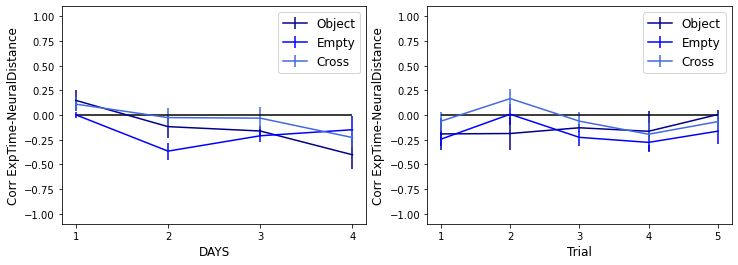

In [38]:
random1 = correlation_object1.reshape(4,5)
stable1 = correlation_empty1.reshape(4,5)
overlapping1 = correlation_cross1.reshape(4,5)

figure, axes = plt.subplots(1,2)

trials = np.arange(0,5)
axes[1].errorbar(trials,np.nanmean(random1,axis = 0),np.nanstd(random1,axis = 0)/np.sqrt(random.shape[0]),color = color_random[0])
axes[1].errorbar(trials,np.nanmean(stable1,axis = 0),np.nanstd(stable1,axis = 0)/np.sqrt(stable.shape[0]),color = color_stable[0])
axes[1].errorbar(trials,np.nanmean(overlapping1,axis = 0),np.nanstd(overlapping1,axis = 0)/np.sqrt(overlapping.shape[0]), color = color_overlapping[0])

trials = np.arange(0,4)
axes[0].errorbar(trials,np.nanmean(random1,axis = 1),np.nanstd(random1,axis = 1)/np.sqrt(random.shape[0]),color = color_random[0])
axes[0].errorbar(trials,np.nanmean(stable1,axis = 1),np.nanstd(stable1,axis = 1)/np.sqrt(stable.shape[0]),color = color_stable[0])
axes[0].errorbar(trials,np.nanmean(overlapping1,axis = 1),np.nanstd(overlapping1,axis = 1)/np.sqrt(overlapping.shape[0]), color = color_overlapping[0])

for j in range(2):
    axes[j].set_ylim([-1.1,1.1])
        
trials_comparison_pos = [0,1,2,3,4]
tick_label = ['1','2','3','4','5']

axes[1].set_xticks(trials_comparison_pos)
axes[1].set_xlabel('Trial', fontsize = 12)
axes[1].set_ylabel('Corr ExpTime-NeuralDistance', fontsize = 12)
axes[1].set_xticklabels(tick_label)
axes[1].legend(titles,fontsize= 12)
axes[1].hlines(0,0,4,color = 'k')  

trials_comparison_pos = [0,1,2,3]
tick_label = ['1','2','3','4']
axes[0].set_xticks(trials_comparison_pos)
axes[0].set_xlabel('DAYS', fontsize = 12)
axes[0].set_ylabel('Corr ExpTime-NeuralDistance', fontsize = 12)
axes[0].set_xticklabels(tick_label)
axes[0].legend(titles,fontsize= 12)
axes[0].hlines(0,0,3,color = 'k')  

figure.set_size_inches([12,4])

figure.patch.set_facecolor('white')
figure.savefig(figure_path + 'correlation_exp_time_neural_conditions2.png')

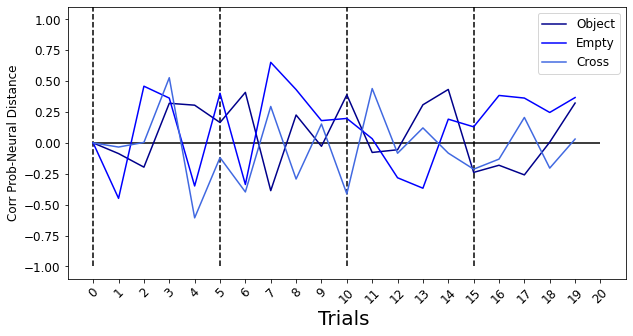

In [37]:
random_mean_occ2= correlation_object2
stable_mean_occ2 = correlation_empty2
overlapping_mean_occ2 = correlation_cross2

figure, axes = plt.subplots()

time = np.arange(0,20)
axes.plot(time,random_mean_occ2[time],'darkblue')
axes.plot(time,stable_mean_occ2[time],'blue')
axes.plot(time,overlapping_mean_occ2[time],'royalblue')

axes.set_ylim([-1.1,1.1])
axes.set_ylabel('Corr Prob-Neural Distance',fontsize = 12)
axes.tick_params(axis='x', labelsize=12)
axes.set_xticks(np.arange(0,21))

axes.tick_params(axis='y', labelsize=12)  
for tick in axes.get_xticklabels():
    tick.set_rotation(45)
axes.hlines(0,0,20,color = 'k')  
axes.legend(titles, fontsize = 12)
axes.vlines([0,5,10,15], -1, 3, colors='k', linestyles='dashed')

axes.set_xlabel('Trials ',fontsize = 20)

figure.set_size_inches([10,5])
figure.patch.set_facecolor('white')
figure.savefig(figure_path + 'correlation_prob_neural_mix_conditions.png')

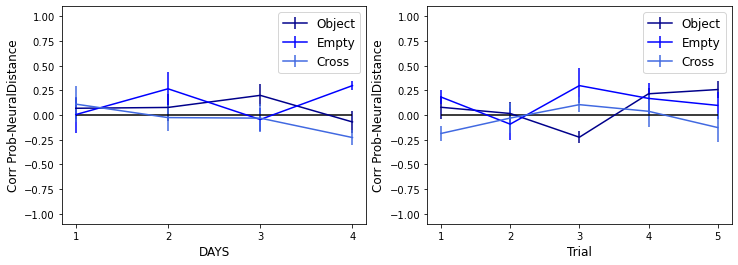

In [40]:
random2 = correlation_object2.reshape(4,5)
stable2 = correlation_empty2.reshape(4,5)
overlapping2 = correlation_cross2.reshape(4,5)

figure, axes = plt.subplots(1,2)

trials = np.arange(0,5)
axes[1].errorbar(trials,np.nanmean(random2,axis = 0),np.nanstd(random2,axis = 0)/np.sqrt(random.shape[0]),color = color_random[0])
axes[1].errorbar(trials,np.nanmean(stable2,axis = 0),np.nanstd(stable2,axis = 0)/np.sqrt(stable.shape[0]),color = color_stable[0])
axes[1].errorbar(trials,np.nanmean(overlapping2,axis = 0),np.nanstd(overlapping2,axis = 0)/np.sqrt(overlapping.shape[0]), color = color_overlapping[0])

trials = np.arange(0,4)
axes[0].errorbar(trials,np.nanmean(random2,axis = 1),np.nanstd(random2,axis = 1)/np.sqrt(random.shape[0]),color = color_random[0])
axes[0].errorbar(trials,np.nanmean(stable2,axis = 1),np.nanstd(stable2,axis = 1)/np.sqrt(stable.shape[0]),color = color_stable[0])
axes[0].errorbar(trials,np.nanmean(overlapping1,axis = 1),np.nanstd(overlapping2,axis = 1)/np.sqrt(overlapping.shape[0]), color = color_overlapping[0])

for j in range(2):
    axes[j].set_ylim([-1.1,1.1])
        
trials_comparison_pos = [0,1,2,3,4]
tick_label = ['1','2','3','4','5']

axes[1].set_xticks(trials_comparison_pos)
axes[1].set_xlabel('Trial', fontsize = 12)
axes[1].set_ylabel('Corr Prob-NeuralDistance', fontsize = 12)
axes[1].set_xticklabels(tick_label)
axes[1].legend(titles,fontsize= 12)
axes[1].hlines(0,0,4,color = 'k')  

trials_comparison_pos = [0,1,2,3]
tick_label = ['1','2','3','4']
axes[0].set_xticks(trials_comparison_pos)
axes[0].set_xlabel('DAYS', fontsize = 12)
axes[0].set_ylabel('Corr Prob-NeuralDistance', fontsize = 12)
axes[0].set_xticklabels(tick_label)
axes[0].legend(titles,fontsize= 12)
axes[0].hlines(0,0,3,color = 'k')  

figure.set_size_inches([12,4])

figure.patch.set_facecolor('white')
figure.savefig(figure_path + 'correlation_prob_neural_conditions2.png')